In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### This Dataset describes the differance between Bitcoin and Ether

In [32]:
df=pd.read_csv(r'data-cleaning-rmotr-freecodecamp\data\btc-eth-prices-outliers.csv',parse_dates=[0],index_col=0)

### to see first 5 rows

In [33]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


### define type of used data

In [10]:
df.dtypes

Bitcoin    float64
Ether      float64
dtype: object

#### Number of rows , cols

In [11]:
df.shape

(365, 2)

#### data visualization

<AxesSubplot:xlabel='Timestamp'>

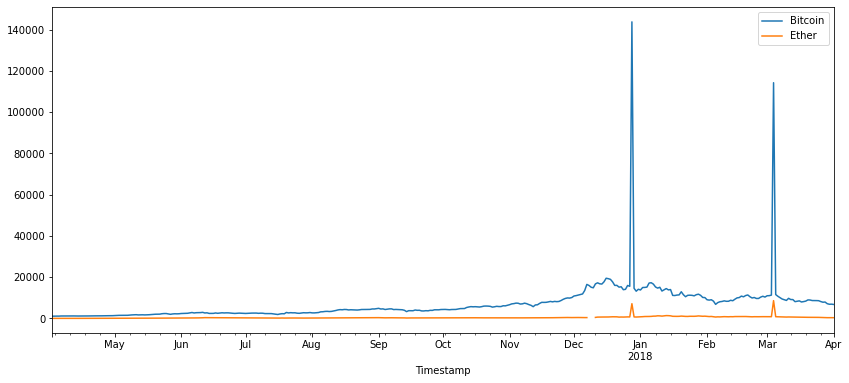

In [13]:
df.plot(figsize=(14,6))

In [12]:
df.describe()

,Bitcoin,Ether
count,365.000000,362.000000
mean,6996.004022,469.247072
std,10186.586168,636.820105
min,1099.169125,42.310000
25%,2585.349186,238.525000
50%,4594.987850,308.825000
75%,9182.843333,657.502500
max,143805.816667,8648.300000


#### Found null values in my data so you should handle that

In [16]:
df.loc['2017-12':'2017-12-15']

,Bitcoin,Ether
Timestamp,,
2017-12-01,10883.912000,461.58
2017-12-02,11071.368333,457.96
2017-12-03,11332.622000,462.81
2017-12-04,11584.830000,466.93
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN


In [35]:
df_na=df.loc['2017-12':'2017-12-15']

In [36]:
df_na.isna().any()

Bitcoin    False
Ether       True
dtype: bool

#### define rows have null value

In [37]:
df_na[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


#### handle null values by filling them like row previous

In [38]:
df_na['Ether'].fillna(method='bfill')

Timestamp
2017-12-01    461.58
2017-12-02    457.96
2017-12-03    462.81
2017-12-04    466.93
2017-12-05    453.96
2017-12-06    422.48
2017-12-07    421.15
2017-12-08    513.29
2017-12-09    513.29
2017-12-10    513.29
2017-12-11    513.29
2017-12-12    656.52
2017-12-13    699.09
2017-12-14    693.58
2017-12-15    684.27
Name: Ether, dtype: float64

In [39]:
df.fillna(method='bfill',inplace=True)

#### data visualization after modifying 

<AxesSubplot:xlabel='Timestamp'>

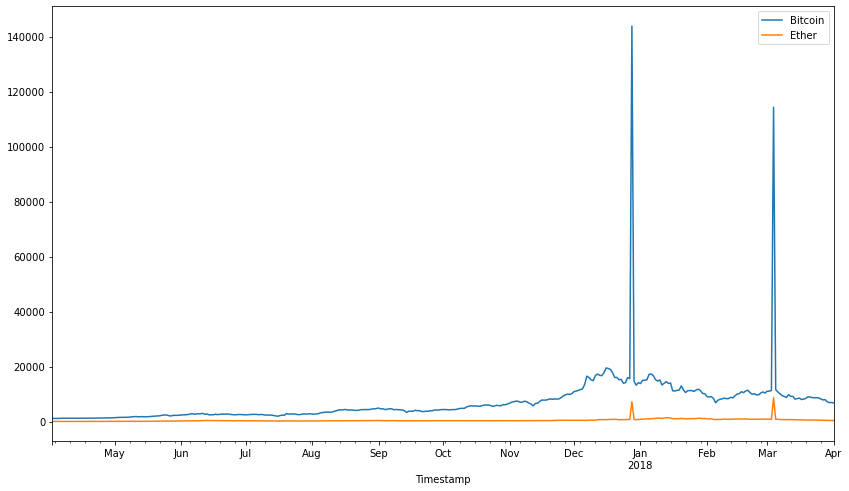

In [40]:
df.plot(figsize=(14,8))

### Summary Statistic for Data

In [41]:
df.describe()

,Bitcoin,Ether
count,365.000000,365.000000
mean,6996.004022,469.609068
std,10186.586168,634.202918
min,1099.169125,42.310000
25%,2585.349186,240.940000
50%,4594.987850,309.490000
75%,9182.843333,656.520000
max,143805.816667,8648.300000


### There are outliers value at Bitcoin affect on summary statistic

<AxesSubplot:>

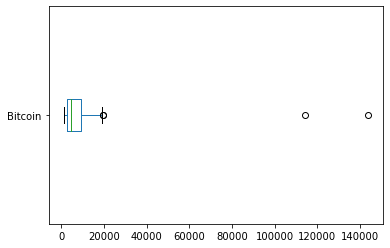

In [42]:
df['Bitcoin'].plot(kind='box',vert=False)

### Fix the huge differance between digital currencies

<AxesSubplot:xlabel='Timestamp'>

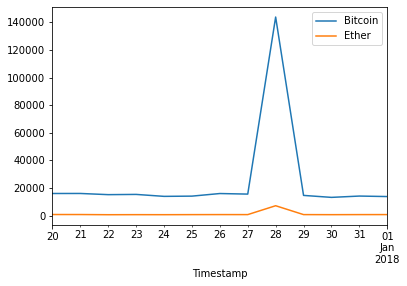

In [43]:
df.loc['2017-12-20':'2018-1-1'].plot()

<AxesSubplot:xlabel='Timestamp'>

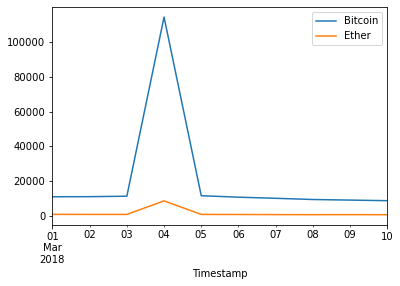

In [44]:
df['2018-3-1':'2018-3-10'].plot()

### Betcoin has two outlier values when date is [ 2017-12-28 , 2018-3-4 ]

In [45]:
df_cleaned=df.drop(pd.to_datetime(['2017-12-28','2018-3-4']))

Text(0.5, 1.0, 'After Modfiy')

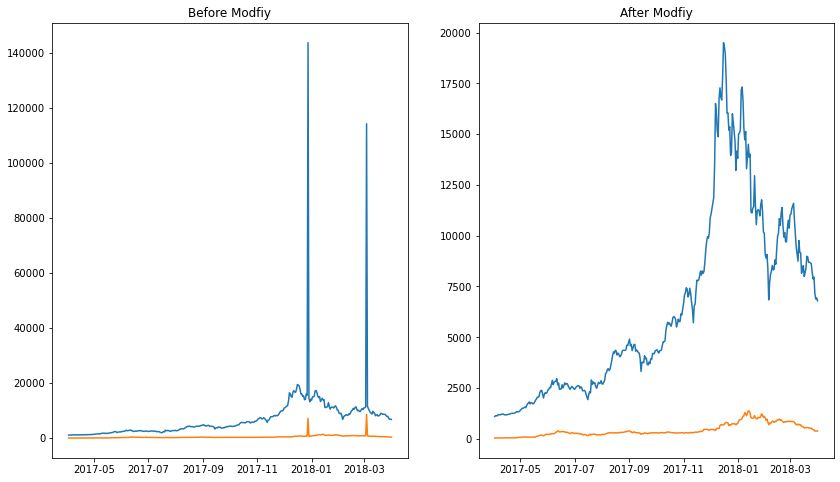

In [46]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(df)
plt.title("Before Modfiy")

plt.subplot(1,2,2)
plt.plot(df_cleaned)
plt.title('After Modfiy')

<AxesSubplot:xlabel='Timestamp'>

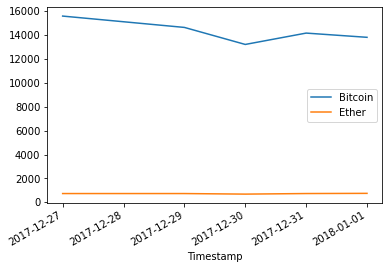

In [44]:
df_cleaned.loc['2017-12-27':'2018-1-1'].plot()

<AxesSubplot:xlabel='Timestamp'>

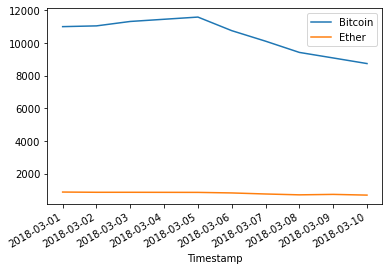

In [45]:
df_cleaned['2018-3-1':'2018-3-10'].plot()

### Summary Statistic After Modifying and Cleanning

In [47]:
df_cleaned.describe()

,Bitcoin,Ether
count,363.000000,363.000000
mean,6323.509186,428.628402
std,4513.757663,306.699311
min,1099.169125,42.310000
25%,2573.739924,239.330000
50%,4580.387480,309.320000
75%,9121.989167,611.855000
max,19498.683333,1385.020000


### Visualizing Distribution 

<AxesSubplot:xlabel='Bitcoin', ylabel='Ether'>

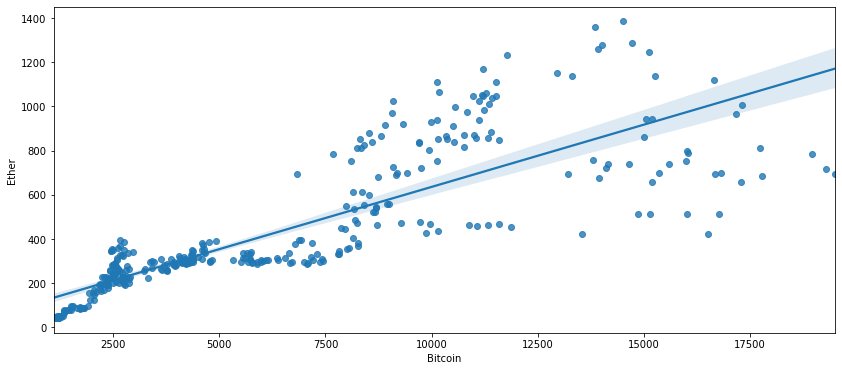

In [49]:
fig,ax=plt.subplots(figsize=(14,6))
sns.regplot(x=df_cleaned['Bitcoin'],y=df_cleaned['Ether'],ax=ax)

Mean   :6323.509186313956
Median :4580.387479999999


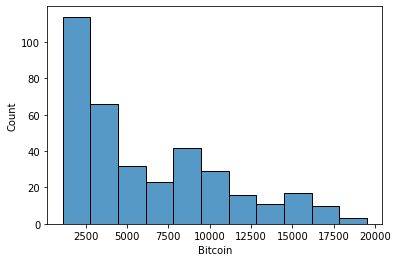

In [64]:
sns.histplot(df_cleaned['Bitcoin'])
print(f'Mean   :{df_cleaned["Bitcoin"].mean()}')
print(f'Median :{df_cleaned["Bitcoin"].median()}')

Mean   :428.6284022038568
Median :309.32


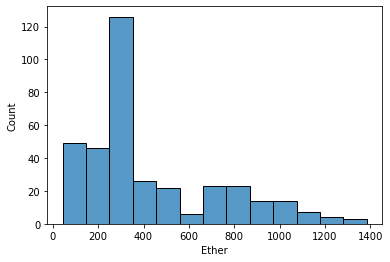

In [65]:
sns.histplot(df_cleaned['Ether'])
print(f'Mean   :{df_cleaned["Ether"].mean()}')
print(f'Median :{df_cleaned["Ether"].median()}')

<AxesSubplot:xlabel='Timestamp'>

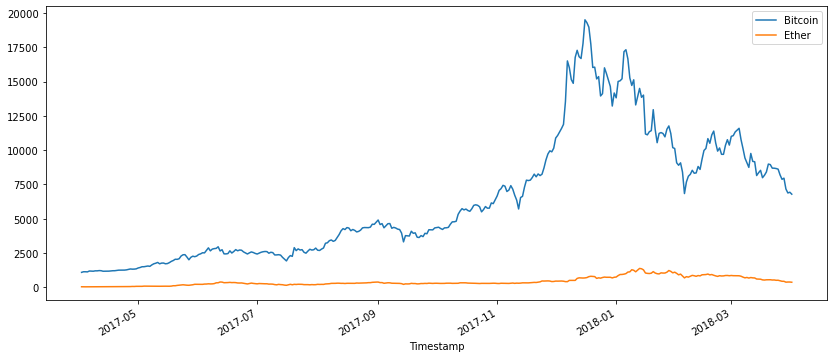

In [66]:
df_cleaned.plot(figsize=(14,6))

#### We showed how can load data from excel file , handle null value and outliers in my data and describe summary statistic for my data and visualize it  